# Analyzing China's GDP growth
> We will analyze China's GDP growth from the year 1960 to 2019. 

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [regression, modeling]

In this blog post, we will analyze China's GDP growth from the year 1960 to 2019. If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression.


In [0]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# read the data into a pandas dataframe
df = pd.read_csv('/content/china_gdp.csv')
df

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


---
### Plot the data

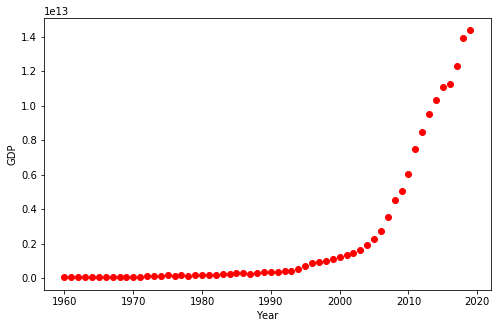

In [7]:
plt.figure(figsize=(8,5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

We can see that the growth starts off slow. Then, from 2005 onwards, the growth is very significant. It decelerates slightly after the period of the 2008 global recession.

---
### Choosing a model
Looking at the plot, a logistic function would be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end.  
Let's check this assumption below:

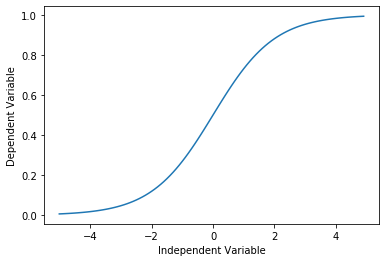

In [8]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

---
### Build the model
Let's build our regression model and initialize its parameters.

In [0]:
def sigmoid(x, Beta_1, Beta_2):
  y = 1/ (1 + np.exp(-Beta_1 * (x - Beta_2)))
  return y

Let's look at a sample sigmoid line that might fit with the data.

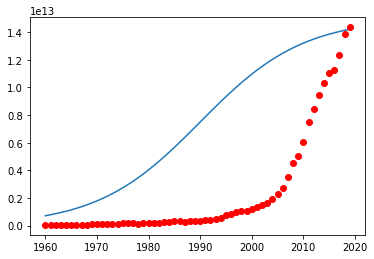

In [16]:
beta_1 = 0.1
beta_2 = 1990

# logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

# plot initial prediction againts data points
plt.plot(x_data, Y_pred*15000000000000)
plt.plot(x_data, y_data, 'ro')

Our task is to find the best parameters for the model.  
First, lets normalize our x and y.

In [0]:
xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

**How can we find the best parameters for our fit line?**  
We can use `curve_fit`, which uses non-linear least squares to fit our sigmoid function to the data.

In [18]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

# print the final parameters
print('beta_1=%f, beta_2=%f' % (popt[0], popt[1]))

beta_1 = 571.415035, beta_2 = 0.995885


---
### Plot the model

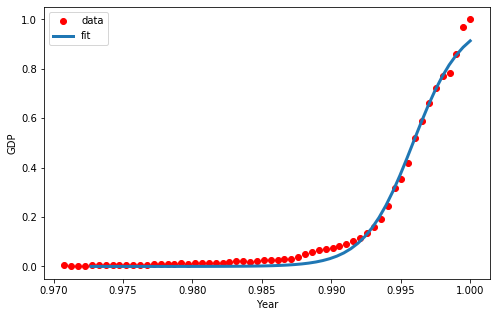

In [19]:
# plot the resulting regression model
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

---
### Train/Test Split the data
Split data into training and testing sets.

In [0]:
msk = np.random.randn(len(df)) < 0.8
train_x = x_data[msk]
test_x = xdata[~msk]
train_y = y_data[msk]
test_y = ydata[~msk]

Build the model using the train set.

In [21]:
popt, pcov = curve_fit(sigmoid, train_x, train_y)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Predict GDP using the test set.

In [0]:
y_hat = sigmoid(test_x, *popt)

---
### Evaluate the model

In [23]:
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_hat - test_y)))
print('Residual sum of error (MSE): %.2f' % np.mean((y_hat - test_y)**2))

from sklearn.metrics import r2_score
print('R2-score: %.2f' % r2_score(y_hat, test_y))

Mean absolute error: 0.40
Residual sum of error (MSE): 0.17
R2-score: -34427.16
